In [1]:
# prompt: google drive connect

#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
#!pip freeze > requirements.txt

In [3]:
csv_path = "data_old.csv"
"/content/drive/MyDrive/HumidityForecast/indoor2.csv"
#"/content/drive/MyDrive/HumidityForecast/Data_TimeSeries.csv"
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from math import sqrt

from statistics import mean

import ast

data = pd.read_csv(csv_path)

print(data.shape)
data

(7335, 7)


,2024-02-05 20:40:05.092914,99.9000015258789,21.100000381469727,275.19,42,"[275.3, 275.19, 275.06, 274.74, 274.27, 273.53, 272.68, 272.39, 272.21, 272.12, 272.08, 272.09, 272.38, 273.24, 274.24, 275.19, 276.03, 276.77, 277.45, 277.91, 278.03, 277.45, 276.54, 276.05, 275.67, 275.25, 274.84, 274.55, 274.25, 273.96, 273.72, 273.5, 273.33, 273.21, 273.14, 273.13, 273.61, 274.67, 275.78, 276.8, 277.74, 278.59, 279.2, 279.59, 279.58, 278.82, 277.86, 277.33]","[41, 42, 41, 41, 37, 34, 36, 40, 43, 46, 48, 50, 50, 48, 46, 44, 42, 40, 39, 39, 41, 44, 49, 52, 54, 56, 58, 60, 62, 63, 65, 67, 68, 68, 69, 69, 66, 62, 57, 53, 49, 47, 44, 43, 45, 47, 51, 54]"
0,2024-02-05 20:45:03.163482,99.900002,21.100000,275.13,43,"[275.25, 275.13, 275.01, 274.71, 274.24, 273.5...","[42, 43, 42, 41, 37, 34, 36, 40, 43, 46, 48, 5..."
1,NaN,99.900002,21.100000,274.99,43,"[275.14, 274.99, 274.9, 274.62, 274.19, 273.49...","[42, 43, 42, 41, 37, 34, 36, 40, 43, 46, 48, 5..."
2,2024-02-05 21:00:04.668119,99.900002,21.000000,274.94,43,"[274.94, 274.86, 274.59, 274.17, 273.48, 272.6...","[43, 42, 41, 37, 34, 36, 40, 43, 46, 48, 50, 5..."
3,2024-02-05 21:05:05.168350,99.900002,20.500000,274.82,43,"[274.82, 274.77, 274.52, 274.12, 273.45, 272.6...","[43, 42, 41, 37, 34, 36, 40, 43, 46, 48, 50, 5..."
4,2024-02-05 21:10:03.604805,99.800003,19.799999,274.80,43,"[274.8, 274.75, 274.51, 274.11, 273.45, 272.68...","[43, 42, 41, 37, 34, 36, 40, 43, 46, 48, 50, 5..."
...,...,...,...,...,...,...,...
7330,2024-03-03 07:50:03.567126,99.599998,20.400000,282.54,86,"[282, 282.54, 282.56, 283.36, 284.68, 286.35, ...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."
7331,2024-03-03 07:55:03.127265,99.500000,20.400000,282.58,86,"[282.03, 282.58, 282.6, 283.38, 284.69, 286.36...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."
7332,2024-03-03 07:50:07.662526,99.500000,20.299999,282.67,86,"[282.1, 282.67, 282.67, 283.43, 284.73, 286.37...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."
7333,2024-03-03 08:00:05.252771,99.599998,20.299999,282.73,85,"[282.73, 282.72, 283.47, 284.75, 286.39, 288.2...","[85, 83, 79, 73, 66, 59, 57, 55, 56, 59, 64, 6..."


In [4]:
data.columns=['Date','Humidity','Temperature','Current_Temp','Current_Humidity','Forecast_Temp','Forecast_Humidity']

In [5]:
data = data.dropna(subset=['Date','Humidity','Temperature','Current_Temp','Current_Humidity','Forecast_Temp','Forecast_Humidity'])


In [6]:
#pd.to_datetime(data["Date"].iloc[0],
#               format='%Y-%m-%d %H:%M:%S.%f')
data.Date = pd.to_datetime(data["Date"],
               format='%Y-%m-%d %H:%M:%S.%f')
data.index = data['Date']
#data = data.rename(columns={'Temperature':'Humidity', 'Humidity':'Temperature'})

C:\Users\geeta\AppData\Local\Temp\ipykernel_26640\2802386319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Date = pd.to_datetime(data["Date"],


In [7]:
data = data.drop(data[data['Humidity'] >= 100].index)
#data = data.drop(data[data['Humidity'] <= 75].index)

In [8]:
data = data.loc[data.Date >= '2024-02-07 12:10:04']
#2024-02-12 18:40:09
#data = data.drop()
data_ML_factors = data[['Temperature','Current_Temp','Current_Humidity']]
data_ML_Y = data[['Humidity']]

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
X = data_ML_factors.to_numpy()
y = data_ML_Y.to_numpy()

reg = LinearRegression().fit(X,y)
svc = svm.SVR(kernel='sigmoid').fit(X,y)
print(str(reg.coef_))



d:\ScienceFair\dash_app_example\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-0.23791846  0.67461398  0.15192133]]


In [10]:
y

array([[91.90000153],
       [90.19999695],
       [90.        ],
       ...,
       [99.5       ],
       [99.59999847],
       [99.09999847]])

In [11]:
len(data)

6853

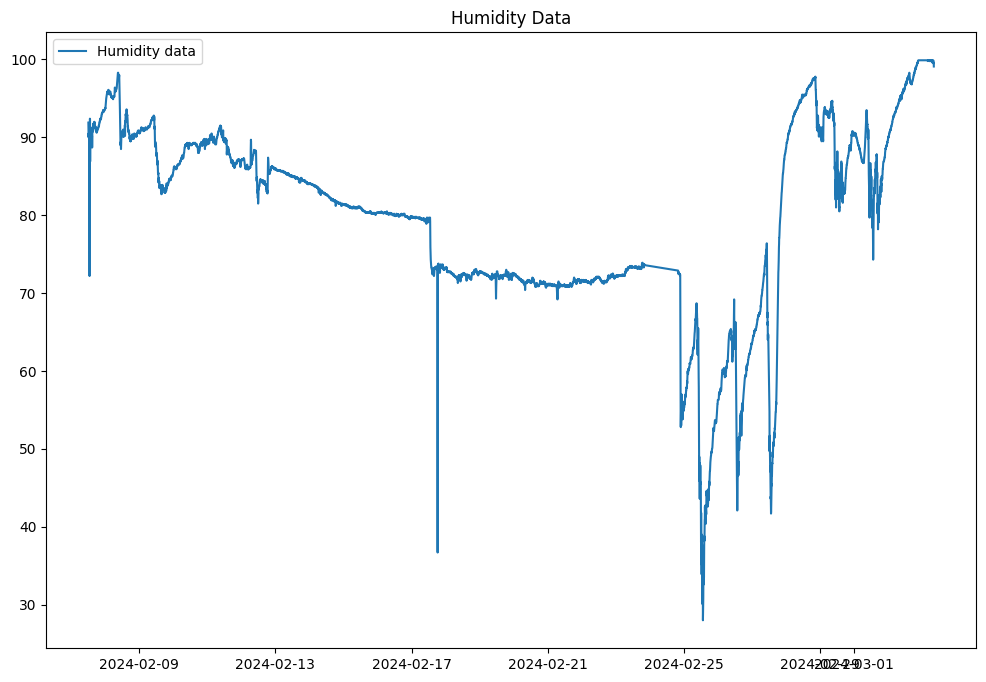

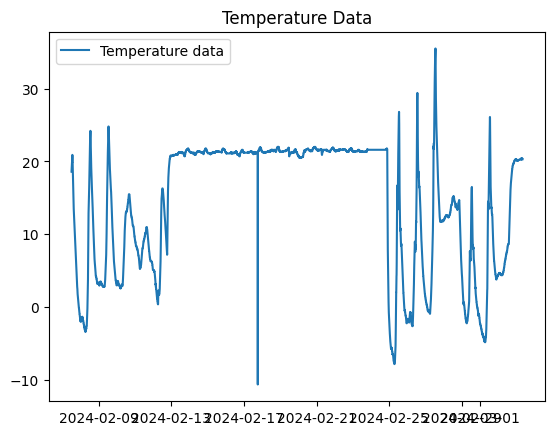

In [12]:
data.shape

plt.figure(figsize=(12,8))

plt.plot(data.Date, data['Humidity'], label='Humidity data')

plt.legend(loc='best')
plt.title("Humidity Data")
plt.show()

plt.plot(data.Date, data['Temperature'], label='Temperature data')

plt.legend(loc='best')
plt.title("Temperature Data")
plt.show()

In [13]:
data_feat = pd.DataFrame({"year": data['Date'].dt.year,
                          "month": data['Date'].dt.month,
                          "day": data['Date'].dt.day,
                          "dayofyear": data['Date'].dt.dayofyear,
                          "week": data['Date'].dt.weekday,
                          "weekday": data['Date'].dt.dayofweek,
                          "quarter": data['Date'].dt.quarter,
                         })
data_feat.head()

,year,month,day,dayofyear,week,weekday,quarter
Date,,,,,,,
2024-02-07 12:10:04.347779,2024,2,7,38,2,2,1
2024-02-07 12:15:03.709751,2024,2,7,38,2,2,1
2024-02-07 12:20:04.874747,2024,2,7,38,2,2,1
2024-02-07 12:25:07.623943,2024,2,7,38,2,2,1
2024-02-07 12:30:05.982167,2024,2,7,38,2,2,1


In [14]:
import json
#data['Forecast'] = json.loads(data['Forecast'].to_json(orient='records'))
#type((data['Forecast'].values[0]))

In [15]:
#print(len(ast.literal_eval(data["Forecast"].iloc[0])['hourly']))

In [16]:

#dict_string = data['Forecast'].iloc[0]
#print((len(data)))
temp = []
humidity = []
forecast_temp = []
forecast_humidity = []

for i in range(len(data)):
  temp.append(data['Current_Temp'].iloc[i]- 273.15)
  humidity.append(data['Current_Humidity'].iloc[i])
  #forecast_list = ast.literal_eval(data["Forecast"].iloc[i])['hourly'][0]
  #data['Forecast_Temp'] = data['Forecast_Temp'].astype(float)
  #data['Forecast_Humidity'] = data['Forecast_Humidity'].astype(float)
  #print(type(data['Forecast_Temp']))
  temp_list_temp = data['Forecast_Temp'].iloc[i].strip('][').split(', ')
  temp_list_humidity = data['Forecast_Humidity'].iloc[i].strip('][').split(', ')
  fore_temperature = []
  fore_humidity = []
  #print(temp_list_temp)
  for x in range(len(temp_list_humidity)):
    fore_temperature.append(float(temp_list_temp[x]) - 273.15)
    fore_humidity.append(temp_list_humidity[x])
  forecast_temp.append(fore_temperature)
  forecast_humidity.append(fore_humidity)
  #forecast_humidity.append(ast.literal_eval(data["Forecast"].iloc[i])['hourly'][0]['humidity'])
  #print(str(i))
  i = i + 1
data['Current_Temp'] = temp
data['Current_Humidity'] = humidity
data['Forecast_Temp'] = forecast_temp
data['Forecast_Humidity'] = forecast_humidity
#print(json.dumps(data.reset_index(drop=True)["Forecast"].to_string()))
#print(type(data.reset_index(drop=True)["Forecast"].to_string()))

In [17]:
data

,Date,Humidity,Temperature,Current_Temp,Current_Humidity,Forecast_Temp,Forecast_Humidity
Date,,,,,,,
2024-02-07 12:10:04.347779,2024-02-07 12:10:04.347779,91.900002,18.600000,6.31,49,"[6.310000000000002, 6.220000000000027, 6.33000...","[49, 48, 47, 46, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:15:03.709751,2024-02-07 12:15:03.709751,90.199997,18.799999,6.33,49,"[6.330000000000041, 6.230000000000018, 6.34000...","[49, 48, 47, 46, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:20:04.874747,2024-02-07 12:20:04.874747,90.000000,18.799999,6.41,48,"[6.410000000000025, 6.300000000000011, 6.39000...","[48, 47, 46, 45, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:25:07.623943,2024-02-07 12:25:07.623943,90.500000,18.900000,6.53,48,"[6.53000000000003, 6.390000000000043, 6.460000...","[48, 47, 46, 45, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:30:05.982167,2024-02-07 12:30:05.982167,90.099998,19.100000,6.65,48,"[6.32000000000005, 6.650000000000034, 6.590000...","[49, 48, 47, 46, 46, 48, 51, 54, 56, 57, 59, 6..."
...,...,...,...,...,...,...,...
2024-03-03 07:50:03.567126,2024-03-03 07:50:03.567126,99.599998,20.400000,9.39,86,"[8.850000000000023, 9.390000000000043, 9.41000...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."
2024-03-03 07:55:03.127265,2024-03-03 07:55:03.127265,99.500000,20.400000,9.43,86,"[8.879999999999995, 9.430000000000007, 9.45000...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."
2024-03-03 07:50:07.662526,2024-03-03 07:50:07.662526,99.500000,20.299999,9.52,86,"[8.950000000000045, 9.520000000000039, 9.52000...","[88, 86, 84, 80, 74, 66, 59, 57, 55, 56, 59, 6..."


Trials

In [18]:
#ast.literal_eval(data["Forecast"].iloc[378])['current']['temp']

In [19]:
data["Current_Temp"].iloc[0]

6.310000000000002

In [20]:
complete_data = pd.concat([data_feat, data], axis=1)
complete_data.head()

,year,month,day,dayofyear,week,weekday,quarter,Date,Humidity,Temperature,Current_Temp,Current_Humidity,Forecast_Temp,Forecast_Humidity
Date,,,,,,,,,,,,,,
2024-02-07 12:10:04.347779,2024,2,7,38,2,2,1,2024-02-07 12:10:04.347779,91.900002,18.600000,6.31,49,"[6.310000000000002, 6.220000000000027, 6.33000...","[49, 48, 47, 46, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:15:03.709751,2024,2,7,38,2,2,1,2024-02-07 12:15:03.709751,90.199997,18.799999,6.33,49,"[6.330000000000041, 6.230000000000018, 6.34000...","[49, 48, 47, 46, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:20:04.874747,2024,2,7,38,2,2,1,2024-02-07 12:20:04.874747,90.000000,18.799999,6.41,48,"[6.410000000000025, 6.300000000000011, 6.39000...","[48, 47, 46, 45, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:25:07.623943,2024,2,7,38,2,2,1,2024-02-07 12:25:07.623943,90.500000,18.900000,6.53,48,"[6.53000000000003, 6.390000000000043, 6.460000...","[48, 47, 46, 45, 45, 48, 51, 54, 56, 57, 59, 6..."
2024-02-07 12:30:05.982167,2024,2,7,38,2,2,1,2024-02-07 12:30:05.982167,90.099998,19.100000,6.65,48,"[6.32000000000005, 6.650000000000034, 6.590000...","[49, 48, 47, 46, 46, 48, 51, 54, 56, 57, 59, 6..."


In [21]:
complete_data['Date'] = pd.to_datetime(complete_data['Date'])
complete_data = complete_data.set_index('Date')
complete_data.Humidity = complete_data.Humidity.astype(float)

In [22]:
complete_data['Humidity'] = complete_data['Humidity'].astype(float)
complete_data.dtypes

year                   int32
month                  int32
day                    int32
dayofyear              int32
week                   int32
weekday                int32
quarter                int32
Humidity             float64
Temperature          float64
Current_Temp         float64
Current_Humidity       int64
Forecast_Temp         object
Forecast_Humidity     object
dtype: object

<Axes: xlabel='Date'>

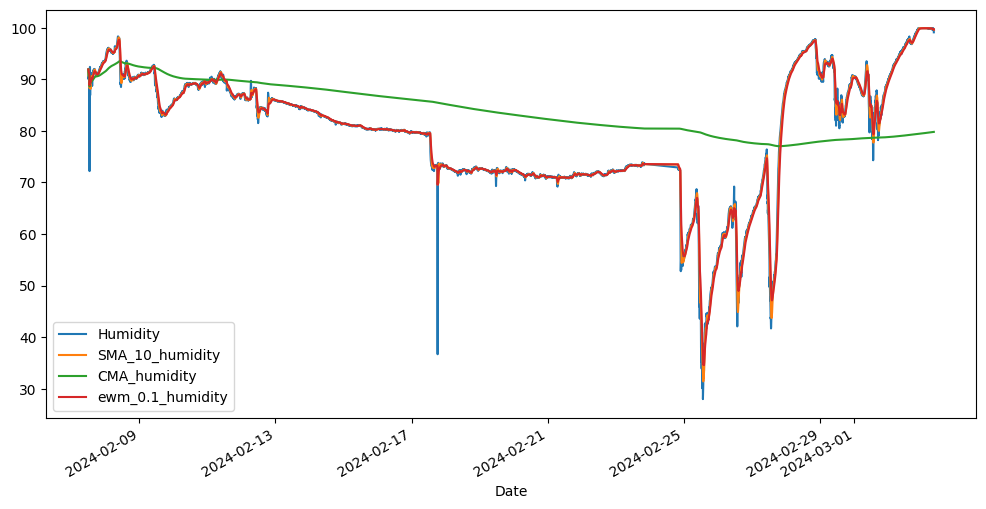

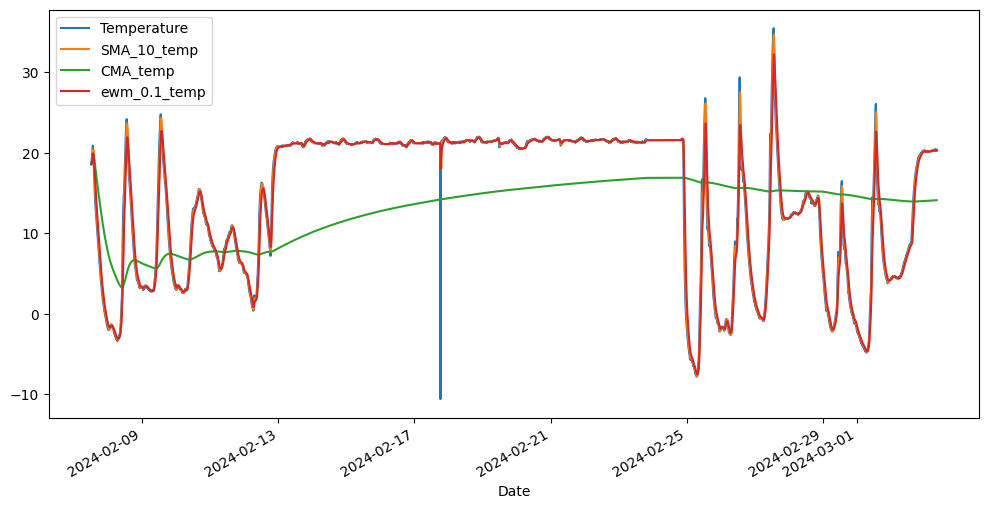

In [23]:
#SMA
complete_data['SMA_10_temp'] = complete_data.Temperature.rolling(10,min_periods=1).mean()
complete_data['SMA_20_temp'] = complete_data.Temperature.rolling(20,min_periods=1).mean()

complete_data['SMA_10_humidity'] = complete_data.Humidity.rolling(10,min_periods=1).mean()
complete_data['SMA_20_humidity'] = complete_data.Humidity.rolling(20,min_periods=1).mean()
#CMA
complete_data['CMA_temp'] = complete_data.Temperature.expanding().mean()
complete_data['CMA_humidity'] = complete_data.Humidity.expanding().mean()

#EMA
complete_data['ewm_0.1_temp'] = complete_data.Temperature.ewm(alpha=0.1,adjust=False).mean()
complete_data['ewm_0.3_temp'] = complete_data.Temperature.ewm(alpha=0.3,adjust=False).mean()
complete_data['ewm_0.1_humidity'] = complete_data.Humidity.ewm(alpha=0.1,adjust=False).mean()
complete_data['ewm_0.3_humidity'] = complete_data.Humidity.ewm(alpha=0.3,adjust=False).mean()


colors = ['green','red','orange']
complete_data[['Humidity','SMA_10_humidity','CMA_humidity','ewm_0.1_humidity']].plot(figsize=(12,6))
complete_data[['Temperature','SMA_10_temp','CMA_temp','ewm_0.1_temp']].plot(figsize=(12,6))


In [24]:
complete_data.columns

Index(['year', 'month', 'day', 'dayofyear', 'week', 'weekday', 'quarter',
       'Humidity', 'Temperature', 'Current_Temp', 'Current_Humidity',
       'Forecast_Temp', 'Forecast_Humidity', 'SMA_10_temp', 'SMA_20_temp',
       'SMA_10_humidity', 'SMA_20_humidity', 'CMA_temp', 'CMA_humidity',
       'ewm_0.1_temp', 'ewm_0.3_temp', 'ewm_0.1_humidity', 'ewm_0.3_humidity'],
      dtype='object')

In [25]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
plot_data = complete_data[['Humidity', 'Temperature', 'Current_Temp','Current_Humidity', 'Forecast_Temp', 'Forecast_Humidity', 'SMA_10_temp', 'SMA_20_temp', 'SMA_10_humidity','SMA_20_humidity', 'CMA_temp', 'CMA_humidity', 'ewm_0.1_temp','ewm_0.3_temp','ewm_0.1_humidity','ewm_0.3_humidity']]
#plot_data.corr()

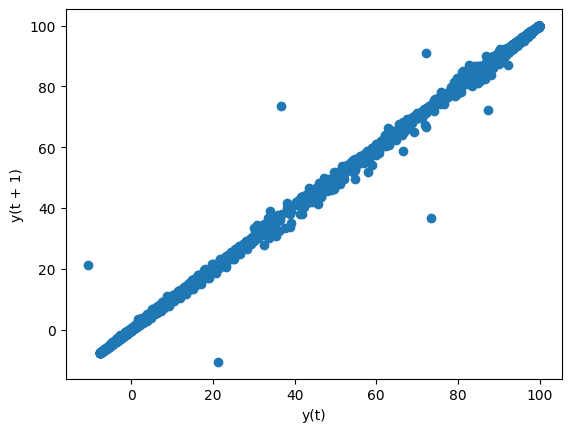

In [26]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(plot_data[['Temperature','Humidity']])
pyplot.show()

In [27]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
#from sklearn.model_selection import train_test_split
X = plot_data[['Temperature','Current_Temp','Current_Humidity','SMA_10_temp', 'SMA_20_temp', 'SMA_10_humidity','SMA_20_humidity', 'CMA_temp', 'CMA_humidity', 'ewm_0.1_temp','ewm_0.3_temp']].astype(float)
y = plot_data['Humidity'].astype(float)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

y_to_train = y[y.index <= '2024-02-19']
y_to_test = y[y.index > '2024-02-20']

In [28]:
len(y_to_test)

3260

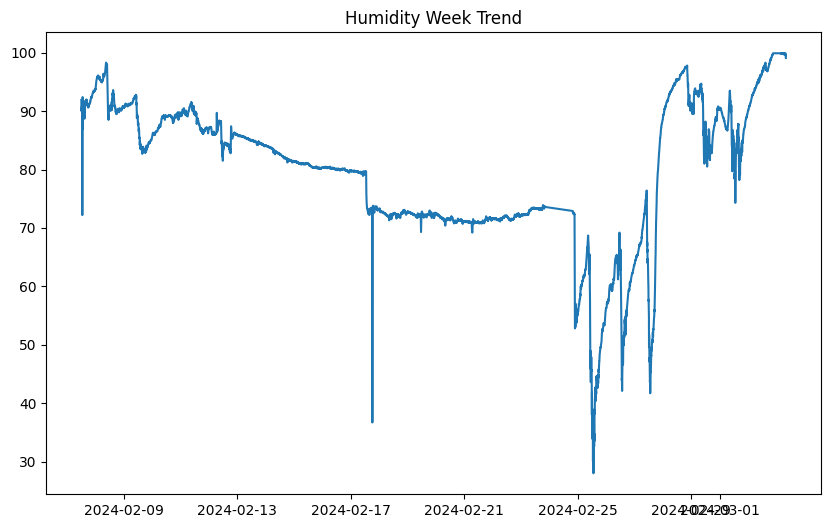

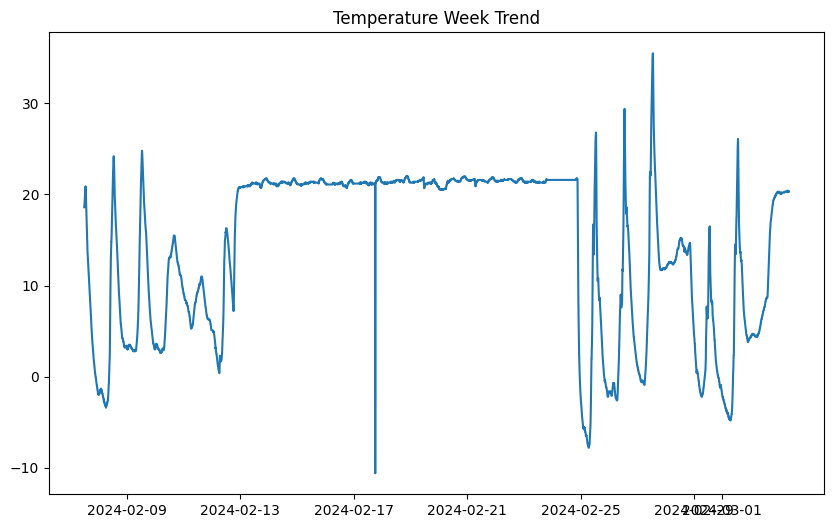

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [29]:
plt.figure(figsize=(10,6))
plt.plot(plot_data['Humidity'], )
plt.title('Humidity Week Trend')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(plot_data['Temperature'], )
plt.title('Temperature Week Trend')
plt.show()
plt.figure(figsize=(10,6))
#plt.plot( plot_data['Forecast_Temp'], )
#plt.title('Forecast Temp Week Trend')
#plt.show()
#plt.figure(figsize=(10,6))
#plt.plot( plot_data['Forecast_Humidity'], )
#plt.title('Forecast Humidity Week Trend')
#plt.show()

In [30]:
plot_data.index

DatetimeIndex(['2024-02-07 12:10:04.347779', '2024-02-07 12:15:03.709751',
               '2024-02-07 12:20:04.874747', '2024-02-07 12:25:07.623943',
               '2024-02-07 12:30:05.982167', '2024-02-07 12:35:04.822142',
               '2024-02-07 12:40:04.154358', '2024-02-07 12:45:03.777684',
               '2024-02-07 12:50:04.495617', '2024-02-07 12:55:03.374399',
               ...
               '2024-03-03 07:25:04.612923', '2024-03-03 07:30:04.942063',
               '2024-03-03 07:35:03.994189', '2024-03-03 07:40:02.961624',
               '2024-03-03 07:45:04.134759', '2024-03-03 07:50:03.567126',
               '2024-03-03 07:55:03.127265', '2024-03-03 07:50:07.662526',
               '2024-03-03 08:00:05.252771', '2024-03-03 08:05:06.425506'],
              dtype='datetime64[ns]', name='Date', length=6853, freq=None)

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model_humid = ARIMA(plot_data['Humidity'], order=(1,0,0))
model_fit_humid = model_humid.fit()
prediction_humid = model_fit_humid.forecast(steps=50)

model_temp = ARIMA(plot_data['Temperature'], order=(1,0,0))
model_fit_temp = model_temp.fit()
prediction_temp = model_fit_temp.forecast(steps=50)
complete_data.index = pd.DatetimeIndex(complete_data.index).to_period('min')
print(complete_data.index[-1])
label = complete_data.index[-1]+60
label
data = [[prediction_temp.iloc[12],float(plot_data['Forecast_Humidity'][-1][0]),plot_data['Forecast_Temp'][-1][0]]]
data_ML_test = pd.DataFrame(data)
print("Prediction for time:",label)
print("data",data)
print(reg.predict(np.array(data)))
print(svc.predict(np.array(data)))

d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates

2024-03-03 08:05
Prediction for time: 2024-03-03 09:05
data [[20.124320007529672, 84.0, 9.800000000000011]]
[[-60.15181173]]
[88.37992554]


d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\geeta\AppData\Local\Temp\ipykernel_26640\645129344.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = [[prediction_temp.iloc[12],float(plot_data['Forecast_Humidity'][-1][0]),plot_data['Forecast_Temp'][-1][0]]]


In [32]:
data

[[20.124320007529672, 84.0, 9.800000000000011]]

In [33]:
df_originalData = plot_data[['Humidity','Temperature']]

In [34]:
prediction_temp.name = 'Temperature'
prediction_humid.name = 'Humidity'

In [35]:
df_originalData.index

DatetimeIndex(['2024-02-07 12:10:04.347779', '2024-02-07 12:15:03.709751',
               '2024-02-07 12:20:04.874747', '2024-02-07 12:25:07.623943',
               '2024-02-07 12:30:05.982167', '2024-02-07 12:35:04.822142',
               '2024-02-07 12:40:04.154358', '2024-02-07 12:45:03.777684',
               '2024-02-07 12:50:04.495617', '2024-02-07 12:55:03.374399',
               ...
               '2024-03-03 07:25:04.612923', '2024-03-03 07:30:04.942063',
               '2024-03-03 07:35:03.994189', '2024-03-03 07:40:02.961624',
               '2024-03-03 07:45:04.134759', '2024-03-03 07:50:03.567126',
               '2024-03-03 07:55:03.127265', '2024-03-03 07:50:07.662526',
               '2024-03-03 08:00:05.252771', '2024-03-03 08:05:06.425506'],
              dtype='datetime64[ns]', name='Date', length=6853, freq=None)

In [36]:
df_originalData.index = pd.DatetimeIndex(df_originalData.index).to_period('min')
label = df_originalData.index[-1]+5
idx = pd.date_range(str(label),periods=50,freq='5min')
df_forecast_arima = pd.concat([prediction_humid,prediction_temp],axis=1).set_index(idx)
df_forecast_arima = df_forecast_arima.rename(columns={'predicted_mean':'Humidity','predicted_mean':'Temperature'})
len_total = len(df_originalData) + len(df_forecast_arima)
label = df_originalData.index[0]
idx = pd.date_range(str(label),periods=len_total,freq='5min')
df_withforecast_arima = pd.concat([df_originalData,df_forecast_arima]).set_index(idx)

In [37]:
df_forecast_arima

,Humidity,Temperature
2024-03-03 08:10:00,99.053961,20.286305
2024-03-03 08:15:00,99.008033,20.272641
2024-03-03 08:20:00,98.962215,20.259007
2024-03-03 08:25:00,98.916507,20.245403
2024-03-03 08:30:00,98.870907,20.231830
2024-03-03 08:35:00,98.825416,20.218287
2024-03-03 08:40:00,98.780034,20.204773
2024-03-03 08:45:00,98.734759,20.191290
2024-03-03 08:50:00,98.689593,20.177837
2024-03-03 08:55:00,98.644535,20.164413


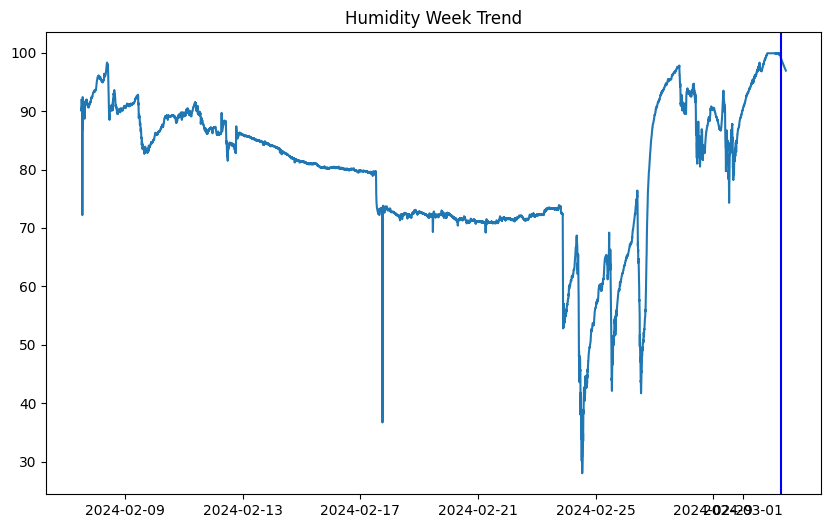

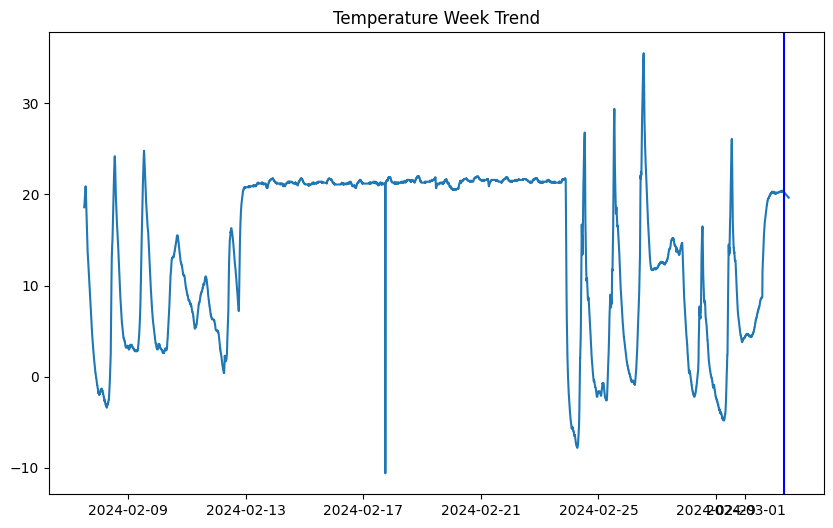

In [38]:

plt.figure(figsize=(10,6))
plt.plot(df_withforecast_arima.index,df_withforecast_arima['Humidity'].values)

plt.axvline(x = df_withforecast_arima.index[len(df_originalData)], color = 'b', label = 'axvline - full height')
#plt.plot(df_withforecast.index[len(df_multivariatedata)],0,color='green', linestyle='dashed')
plt.title('Humidity Week Trend')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(df_withforecast_arima.index,df_withforecast_arima['Temperature'].values)
plt.axvline(x = df_withforecast_arima.index[len(df_originalData)], color = 'b', label = 'axvline - full height')
plt.title('Temperature Week Trend')
plt.show()

In [39]:
df_multivariatedata = complete_data[['Humidity','Temperature']].astype(float)


In [40]:
#df_multivariatedata.index = pd.DatetimeIndex(df_multivariatedata.index).to_period('min')

In [41]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_multivariatedata['Humidity'],autolag='AIC')
result = adfuller(df_multivariatedata['Temperature'],autolag='AIC')

In [42]:
labels=['ADF test statistic','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
for key,val in result[4].items():
  out[f'critical value ({key})']=val
print(out.to_string())

ADF test statistic        -4.414380
p-value                    0.000280
# lags used                9.000000
# observations          6843.000000
critical value (1%)       -3.431306
critical value (5%)       -2.861962
critical value (10%)      -2.566995


In [43]:
train = df_multivariatedata[:int(0.8*(len(df_multivariatedata)))]
valid = df_multivariatedata[int(0.8*(len(df_multivariatedata))):]

from statsmodels.tsa.vector_ar.var_model import VAR
valid_len = len(valid)
model= VAR(endog = train)
model_fit = model.fit()

model_fit.summary()
prediction = model_fit.forecast(valid.values[-valid_len:],steps=valid_len)

In [44]:
df_multivariatedata.index[-1]+5

Period('2024-03-03 08:10', 'min')

In [45]:
label = df_multivariatedata.index[-1]+5
idx = pd.date_range(str(label),periods=valid_len,freq='5min')
df_forecast = pd.DataFrame(data=prediction,index=idx, columns=['Humidity','Temperature'])

In [46]:
df_forecast.head(12)

,Humidity,Temperature
2024-03-03 08:10:00,98.982640,20.289946
2024-03-03 08:15:00,98.865733,20.279923
2024-03-03 08:20:00,98.749274,20.269933
2024-03-03 08:25:00,98.633263,20.259973
2024-03-03 08:30:00,98.517697,20.250045
2024-03-03 08:35:00,98.402576,20.240148
2024-03-03 08:40:00,98.287896,20.230282
2024-03-03 08:45:00,98.173658,20.220447
2024-03-03 08:50:00,98.059858,20.210643
2024-03-03 08:55:00,97.946496,20.200869


In [47]:
#train = df_multivariatedata[:int(0.8*(len(df_multivariatedata)))]
#valid = df_multivariatedata[int(0.8*(len(df_multivariatedata))):]

#from statsmodels.tsa.vector_ar.var_model import VAR
valid_len = len(valid)
model= VAR(endog = df_multivariatedata)
model_fit = model.fit()

model_fit.summary()
prediction = model_fit.forecast(df_multivariatedata.values,steps=50)

d:\ScienceFair\dash_app_example\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
label = df_multivariatedata.index[-1]+5
idx = pd.date_range(str(label),periods=50,freq='5min')
df_forecast = pd.DataFrame(data=prediction,index=idx, columns=['Humidity','Temperature'])
len_total = len(df_multivariatedata) + len(df_forecast)
label = df_multivariatedata.index[0]
idx = pd.date_range(str(label),periods=len_total,freq='5min')
"""label = str(df_multivariatedata.index[-1]+5)
#idx_initial = df_multivariatedata.index
idx_forecast = pd.period_range(str(label),periods=50,freq='5min')
df_forecast = pd.DataFrame(data=prediction,index=idx_forecast, columns=['Humidity','Temperature'])
len_total = len(df_multivariatedata) + len(df_forecast)
label = df_multivariatedata.index[0]
#df_multivariatedata = df_multivariatedata.resample('5min')
#idx_whole = pd.concat([idx_initial.to_series(),idx_forecast.to_series()])
idx_whole = pd.period_range(str(label),periods=len(pd.concat([df_multivariatedata,df_forecast],ignore_index=True)),freq='5min')
df_withforecast = pd.concat([df_multivariatedata,df_forecast],ignore_index=True)
df_withforecast.index = idx_whole
df_withforecast.index.name = "Date"""
df_withforecast = pd.concat([df_multivariatedata,df_forecast],axis = 0)
#df_withforecast.index = idx

In [49]:
df_withforecast

,Humidity,Temperature
2024-02-07 12:10,91.900002,18.600000
2024-02-07 12:15,90.199997,18.799999
2024-02-07 12:20,90.000000,18.799999
2024-02-07 12:25,90.500000,18.900000
2024-02-07 12:30,90.099998,19.100000
...,...,...
2024-03-03 11:55:00,94.479220,20.382217
2024-03-03 12:00:00,94.386388,20.382050
2024-03-03 12:05:00,94.293871,20.381806
2024-03-03 12:10:00,94.201670,20.381486


In [50]:
#df_withforecast = df_withforecast.reset_index(drop=False)
#df_withforecast = df_withforecast.rename(columns={"index":"Date"})
df_withforecast.index.name = "Date"
df_withforecast = df_withforecast.reset_index(drop=False)
df_withforecast["Date"] = pd.to_datetime(df_withforecast["Date"].astype(str),format="mixed")
df_withforecast.head(5)
df_withforecast.columns

Index(['Date', 'Humidity', 'Temperature'], dtype='object')

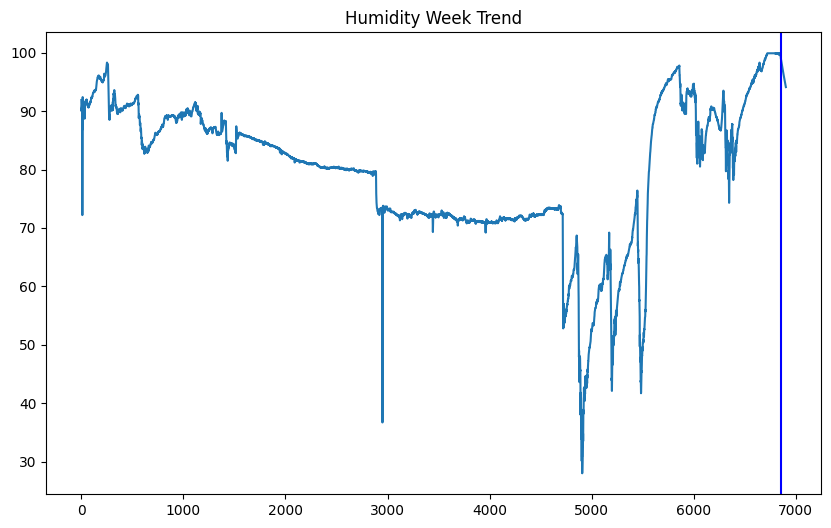

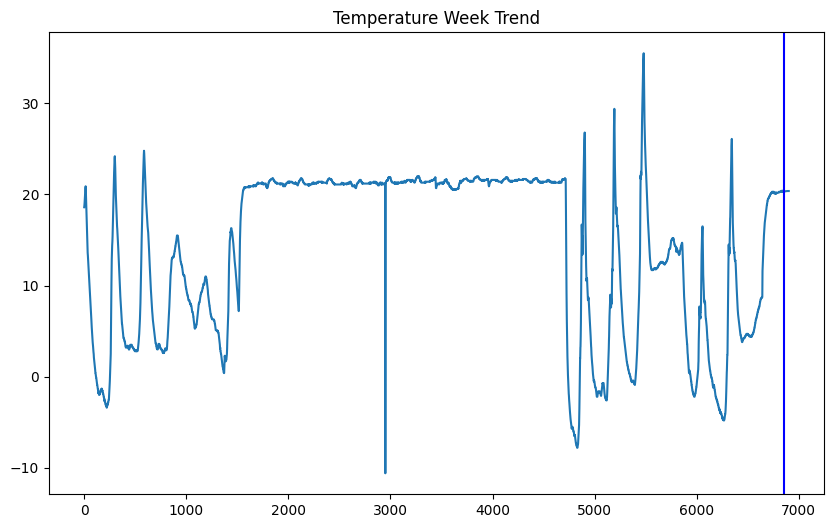

In [51]:
#df_withforecast.index = pd.to_datetime(df_withforecast.index )

df_withforecast['Humidity'] = df_withforecast['Humidity'].astype(float)
df_withforecast['Temperature'] = df_withforecast['Temperature'].astype(float)
#df_withforecast.index = df_withforecast.index.astype(str)
plt.figure(figsize=(10,6))
plt.plot(df_withforecast.index,df_withforecast['Humidity'].values)

plt.axvline(x = df_withforecast.index[len(df_multivariatedata)], color = 'b', label = 'axvline - full height')
#plt.plot(df_withforecast.index[len(df_multivariatedata)],0,color='green', linestyle='dashed')
plt.title('Humidity Week Trend')
plt.show()
plt.figure(figsize=(10,6))
plt.plot(df_withforecast.index,df_withforecast['Temperature'].values)
plt.axvline(x = df_withforecast.index[len(df_multivariatedata)], color = 'b', label = 'axvline - full height')
plt.title('Temperature Week Trend')
plt.show()

In [52]:
!pip install dash

In [53]:
import dash
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import plotly.express as px
import pandas as pd

#df = pd.read_csv('/content/drive/MyDrive/data.csv')

app = Dash(__name__)
server = app.server
app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dash_table.DataTable(data=df_withforecast.to_dict('records'),page_size=10),
    dcc.Graph(figure=px.line(data_frame=df_withforecast[['Date','Temperature']],x='Date',y="Temperature",title="Temperature Trend")),
    dcc.Graph(figure=px.line(data_frame=df_withforecast[['Date','Humidity']],x='Date',y="Humidity",title="Humidity Trend"))
    #dcc.Dropdown(df_withforecast.columns, 'Humidity', id='dropdown-selection'),
    #dcc.Textarea(id='id-textarea',value='value'),
    #dcc.Graph(figure=px.line(df_withforecast.index,df_withforecast['Humidity'].values))
    ])

'''@callback(
    Output('id-textarea', 'value'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):

    dff = df_withforecast[value].values

    fig = px.plot(df_withforecast.index,dff)

    return  dff[0]'''
if __name__ == '__main__':
    app.run(debug=False)